In [1]:
#Wir analysieren nun den Inhalt von sämtlichen Spalten
#In diesem Schritt zeigen wir die Services der Post die an 19'000 Punkten der Schweiz angeboten werden

In [2]:
!python -m pip install --upgrade pip
!pip install openpyxl
import pandas as pd
import openpyxl
import xlrd
import numpy as np
from pandas import DataFrame

import warnings
warnings.filterwarnings("ignore")

!pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

!pip install folium
import folium # plotting library
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df_basisdaten = pd.read_csv('basisdaten.csv', sep = ',')

In [5]:
df_basisdaten = df_basisdaten.drop(df_basisdaten.columns[[0]], axis=1) 

In [6]:
df_basisdaten.shape

(89853, 14)

In [7]:
for col in df_basisdaten:
    print(col, end = ": ")
    print(df_basisdaten[col].nunique())

description_de: 19622
address_city: 3999
address_kantoncode: 28
address_zip: 3200
address_countrycode: 2
address_street: 13310
address_gemeindeid: 2181
geopoint: 18680
poityp_de: 13
groupename_de: 10
service_de: 72
Geopoint_X: 18670
Geopoint_Y: 18669
Einwohnerzahl: 1772


In [8]:
#Die meisten Services, die die Post anbietet sind Services zu Briefen und Paketen
#Bei den Werten 0 handelt es sich um Postfachanlagen oder Briefkästen. 
#Der Wert 0 bedeutet soviel wie #"ist ein Briefkasten oder Postfachanlage". 
#ACHTUNG es hat 4 falsche 0 Werte, die einer Filiale zugeordnet sind
#Wir werden dies in einem späteren Schritt bereinigen

In [9]:
df_basisdaten['groupename_de'].value_counts().to_frame()

,groupename_de
Briefe und Pakete,29807
Zahlungsverkehr,26935
0,14799
Zusatzangebot,6769
Hinweise,5637
Dienstleistungen GK,3655
Infrastruktur,1199
Fotokopierer Schalterhalle,897
Zahlungsmöglichkeit,78
Kraftstoffangebote,77


In [10]:
df_basisdaten['service_de'].value_counts().to_frame()

,service_de
0,14799
Briefe und Pakete empfangen,5537
Briefmarken,5350
PickPost,4025
Briefe und Pakete versenden,3658
Swiss-Express \,3590
Frankieren,3545
Bargeldbezug,3541
Einzahlungen,3519
"Einzahlungen (CHF) mit Karten (PostFinance Card, Maestro, V PAY)",3517


In [11]:
#Hier bereinigen wir die "0" und entfernen die 4 fehlerhaften Einträge 

In [12]:
#Dies sind die 4 fehlerhaften Einträge
df_basisdaten.loc[(df_basisdaten['service_de'] == '0') & (df_basisdaten['poityp_de'] == 'Filiale')]

,description_de,address_city,address_kantoncode,address_zip,address_countrycode,address_street,address_gemeindeid,geopoint,poityp_de,groupename_de,service_de,Geopoint_X,Geopoint_Y,Einwohnerzahl
30143,Geschäftskundenstelle 5405 Baden Täfern Gewerbe,Dättwil AG,AG,5405,CH,Täfernstrasse 4,4021,"47.44884262, 8.29270366",Filiale,0,0,47.448843,8.292704,19547.0
65879,Geschäftskundenstelle 6331 Hünenberg Bösch,Hünenberg,ZG,6331,CH,Bösch 80A,1703,"47.16140663, 8.4348023",Filiale,0,0,47.161407,8.434802,8784.0
66050,Geschäftskundenstelle 8953 Dietikon Silbern,Dietikon,ZH,8953,CH,Moosmattstrasse 24,243,"47.41837507, 8.39648904",Filiale,0,0,47.418375,8.396489,27746.0
66852,Geschäftskundenstelle 1000 Lausanne avenue de ...,Lausanne,VD,1003,CH,Avenue de la Gare 43B,5586,"46.51699921, 6.6318271",Filiale,0,0,46.516999,6.631827,139408.0


In [13]:
df_basisdaten.shape

(89853, 14)

In [14]:
df_basisdaten.drop(df_basisdaten.loc[(df_basisdaten['service_de'] == '0') & (df_basisdaten['poityp_de'] == 'Filiale')].index, inplace=True)

In [15]:
df_basisdaten.shape

(89849, 14)

In [16]:
#Hier setzen wir für die '0' den Wert 'ist_Briefkasten_Postfachanlage'

In [17]:
df_basisdaten.replace("0", 
           "ist_Briefkasten_Postfachanlage", 
           inplace=True)

In [18]:
df_basisdaten['groupename_de'].value_counts().to_frame()

,groupename_de
Briefe und Pakete,29807
Zahlungsverkehr,26935
ist_Briefkasten_Postfachanlage,14795
Zusatzangebot,6769
Hinweise,5637
Dienstleistungen GK,3655
Infrastruktur,1199
Fotokopierer Schalterhalle,897
Zahlungsmöglichkeit,78
Kraftstoffangebote,77


In [19]:
df_basisdaten['service_de'].value_counts().to_frame()

,service_de
ist_Briefkasten_Postfachanlage,14795
Briefe und Pakete empfangen,5537
Briefmarken,5350
PickPost,4025
Briefe und Pakete versenden,3658
Swiss-Express \,3590
Frankieren,3545
Bargeldbezug,3541
Einzahlungen,3519
"Einzahlungen (CHF) mit Karten (PostFinance Card, Maestro, V PAY)",3517


In [20]:
df_POI = df_basisdaten.drop(df_basisdaten[['description_de','address_city','address_zip','address_countrycode','address_street','service_de','groupename_de']], axis=1).drop_duplicates()

In [21]:
df_POI.shape

(21631, 7)

In [22]:
#Wir brauchen dieses Zwischenresultat später noch für die Analyse und daher speichern wir es in diesem df ab.
df_POI_Analyse = df_POI

In [23]:
#Die Post hat am meisten Stellen, um Briefe einzuwerfen
#Dicht gefolgt von Filialen und Standorten die Hausservice anbieten
#Was ist Hausservice?
#https://www.post.ch/de/standorte/hausservice#:~:text=Der%20Hausservice%20kann%20jederzeit%20von,Bargeld%20beziehen
#Am wenigsten Standorte hat die Post für Brief- und Paketzentren

In [24]:
df_POI['poityp_de'].value_counts()

Briefeinwurf              14257
Filiale                    2102
Hausservice                1805
Postfachanlage             1794
Postomat                    803
PickPost-Drittstelle        506
My Post 24                  184
PostFinance-Standorte        89
Post-Tankstelle              39
Logistikzentrum Pakete       30
Logistikzentrum Briefe       15
Paketzentrum                  4
Briefzentrum                  3
Name: poityp_de, dtype: int64

In [25]:
#Wir berechnen nun Kennzahlen fuer Poststandorte in den Kantonen
#In diesem Schritt fügen wir die Anzahl Poststandort nach POI-Typ je Kanton hinzu
#Da es zu wenig Einträge hat verzichten wir die Logistikzentren nach Kantonen zu gruppieren
df_POI_Filiale = df_POI.loc[(df_POI['poityp_de'] == 'Filiale')]
df_POI_Filiale['Filiale_Kanton'] = df_POI_Filiale.groupby(['address_kantoncode'])['poityp_de'].transform('count')
df_attach_Filiale = df_POI_Filiale[['address_kantoncode','Filiale_Kanton']].drop_duplicates().sort_values(by=['address_kantoncode'])
df_POI = pd.merge(df_POI, df_attach_Filiale, how="left", on=['address_kantoncode'])

In [26]:
df_POI_Briefeinwurf = df_POI.loc[(df_POI['poityp_de'] == 'Briefeinwurf')]
df_POI_Briefeinwurf['Briefeinwurf_Kanton'] = df_POI_Briefeinwurf.groupby(['address_kantoncode'])['poityp_de'].transform('count')
df_attach_Briefeinwurf = df_POI_Briefeinwurf[['address_kantoncode','Briefeinwurf_Kanton']].drop_duplicates().sort_values(by=['address_kantoncode'])
df_POI = pd.merge(df_POI, df_attach_Briefeinwurf, how="left", on=['address_kantoncode'])

In [27]:
df_POI_Hausservice = df_POI.loc[(df_POI['poityp_de'] == 'Hausservice')]
df_POI_Hausservice['Hausservice_Kanton'] = df_POI_Hausservice.groupby(['address_kantoncode'])['poityp_de'].transform('count')
df_attach_Hausservice = df_POI_Hausservice[['address_kantoncode','Hausservice_Kanton']].drop_duplicates().sort_values(by=['address_kantoncode'])
df_POI = pd.merge(df_POI, df_attach_Hausservice, how="left", on=['address_kantoncode'])

In [28]:
df_POI_Postfachanlage = df_POI.loc[(df_POI['poityp_de'] == 'Postfachanlage')]
df_POI_Postfachanlage['Postfachanlage_Kanton'] = df_POI_Postfachanlage.groupby(['address_kantoncode'])['poityp_de'].transform('count')
df_attach_Postfachanlage = df_POI_Postfachanlage[['address_kantoncode','Postfachanlage_Kanton']].drop_duplicates().sort_values(by=['address_kantoncode'])
df_POI = pd.merge(df_POI, df_attach_Postfachanlage, how="left", on=['address_kantoncode'])

In [29]:
df_POI_Postomat = df_POI.loc[(df_POI['poityp_de'] == 'Postomat')]
df_POI_Postomat['Postomat_Kanton'] = df_POI_Postomat.groupby(['address_kantoncode'])['poityp_de'].transform('count')
df_attach_Postomat = df_POI_Postomat[['address_kantoncode','Postomat_Kanton']].drop_duplicates().sort_values(by=['address_kantoncode'])
df_POI = pd.merge(df_POI, df_attach_Postomat, how="left", on=['address_kantoncode'])

In [30]:
df_POI_PickPost_Drittstelle = df_POI.loc[(df_POI['poityp_de'] == 'PickPost-Drittstelle')]
df_POI_PickPost_Drittstelle['PickPost-Drittstelle_Kanton'] = df_POI_PickPost_Drittstelle.groupby(['address_kantoncode'])['poityp_de'].transform('count')
df_attach_PickPost_Drittstelle = df_POI_PickPost_Drittstelle[['address_kantoncode','PickPost-Drittstelle_Kanton']].drop_duplicates().sort_values(by=['address_kantoncode'])
df_POI = pd.merge(df_POI, df_attach_PickPost_Drittstelle, how="left", on=['address_kantoncode'])

In [31]:
df_POI_My_Post_24 = df_POI.loc[(df_POI['poityp_de'] == 'My Post 24')]
df_POI_My_Post_24['My_Post_24_Kanton'] = df_POI_My_Post_24.groupby(['address_kantoncode'])['poityp_de'].transform('count')
df_attach_My_Post_24= df_POI_My_Post_24[['address_kantoncode','My_Post_24_Kanton']].drop_duplicates().sort_values(by=['address_kantoncode'])
df_POI = pd.merge(df_POI, df_attach_My_Post_24, how="left", on=['address_kantoncode'])

In [32]:
df_POI_PostFinance_Standorte = df_POI.loc[(df_POI['poityp_de'] == 'PostFinance-Standorte')]
df_POI_PostFinance_Standorte['PostFinance-Standorte_Kanton'] = df_POI_PostFinance_Standorte.groupby(['address_kantoncode'])['poityp_de'].transform('count')
df_attach_PostFinance_Standorte= df_POI_PostFinance_Standorte[['address_kantoncode','PostFinance-Standorte_Kanton']].drop_duplicates().sort_values(by=['address_kantoncode'])
df_POI = pd.merge(df_POI, df_attach_PostFinance_Standorte, how="left", on=['address_kantoncode'])

In [33]:
df_POI_Post_Tankstelle = df_POI.loc[(df_POI['poityp_de'] == 'Post-Tankstelle')]
df_POI_Post_Tankstelle['Post-Tankstelle_Kanton'] = df_POI_Post_Tankstelle.groupby(['address_kantoncode'])['poityp_de'].transform('count')
df_attach_Post_Tankstelle= df_POI_Post_Tankstelle[['address_kantoncode','Post-Tankstelle_Kanton']].drop_duplicates().sort_values(by=['address_kantoncode'])
df_POI = pd.merge(df_POI, df_attach_Post_Tankstelle, how="left", on=['address_kantoncode'])

In [34]:
#Wir berechnen nun die Anzahl einzigartiger Standorte pro Kanton
df_POI = df_POI.drop(df_POI[['poityp_de']], axis=1).drop_duplicates()

In [35]:
df_POI['POI_Kanton'] = df_POI.groupby(['address_kantoncode'])['geopoint'].transform('count')


In [36]:
#Wir berechnen nun die Anzahl Einwohner pro Kanton
df_POI = df_POI.drop(df_POI[['geopoint','Geopoint_X','Geopoint_Y']], axis=1).drop_duplicates()

In [37]:
df_POI['Einwohner_Kanton'] = df_POI.groupby(['address_kantoncode'])['Einwohnerzahl'].transform('sum')

In [38]:
df_Kanton = df_POI.drop(df_POI[['address_gemeindeid','Einwohnerzahl']], axis=1).drop_duplicates().sort_values(by=['address_kantoncode'])

In [39]:
#Wir entfernen noch IT und FL aus dem Datensatz und konzentrieren uns rein auf die Schweizer Kantone
df_Kanton.drop(df_Kanton.loc[(df_Kanton['address_kantoncode'] == 'IT')].index, inplace=True)
df_Kanton.drop(df_Kanton.loc[(df_Kanton['address_kantoncode'] == 'FL')].index, inplace=True)

In [40]:
#Hier ersetzen wir die nan noch mit 0
df_Kanton = df_Kanton.replace(np.nan, 0)
df_Kanton= df_Kanton.set_index('address_kantoncode')
df_Kanton

,Filiale_Kanton,Briefeinwurf_Kanton,Hausservice_Kanton,Postfachanlage_Kanton,Postomat_Kanton,PickPost-Drittstelle_Kanton,My_Post_24_Kanton,PostFinance-Standorte_Kanton,Post-Tankstelle_Kanton,POI_Kanton,Einwohner_Kanton
address_kantoncode,,,,,,,,,,,
AG,174.0,904.0,68.0,143.0,64.0,36.0,15.0,7.0,1.0,1199,687597.0
AI,2.0,19.0,12.0,2.0,1.0,1.0,1.0,0.0,0.0,32,16128.0
AR,21.0,83.0,16.0,20.0,5.0,3.0,0.0,1.0,1.0,127,59489.0
BE,274.0,2187.0,265.0,217.0,122.0,62.0,23.0,12.0,5.0,2787,1041563.0
BL,53.0,346.0,38.0,42.0,28.0,11.0,7.0,3.0,3.0,458,289468.0
BS,26.0,221.0,0.0,11.0,24.0,8.0,5.0,2.0,1.0,272,207948.0
FR,89.0,590.0,193.0,80.0,23.0,23.0,8.0,3.0,1.0,875,321357.0
GE,66.0,491.0,11.0,51.0,38.0,9.0,7.0,2.0,0.0,587,504128.0
GL,17.0,99.0,11.0,13.0,3.0,0.0,1.0,1.0,0.0,115,44466.0


In [41]:
#Wir berechnen hier die Briefkasten und Filialen pro Einwohner
sum_briefkasten = df_Kanton['Einwohner_Kanton'] / df_Kanton['Briefeinwurf_Kanton']
df_Kanton['Briefkasten_pro_Einwohner'] = sum_briefkasten
sum_filiale = df_Kanton['Einwohner_Kanton'] / df_Kanton['Filiale_Kanton']
df_Kanton['Filiale_pro_Einwohner'] = sum_filiale

In [42]:
df_Kanton

,Filiale_Kanton,Briefeinwurf_Kanton,Hausservice_Kanton,Postfachanlage_Kanton,Postomat_Kanton,PickPost-Drittstelle_Kanton,My_Post_24_Kanton,PostFinance-Standorte_Kanton,Post-Tankstelle_Kanton,POI_Kanton,Einwohner_Kanton,Briefkasten_pro_Einwohner,Filiale_pro_Einwohner
address_kantoncode,,,,,,,,,,,,,
AG,174.0,904.0,68.0,143.0,64.0,36.0,15.0,7.0,1.0,1199,687597.0,760.616150,3951.706897
AI,2.0,19.0,12.0,2.0,1.0,1.0,1.0,0.0,0.0,32,16128.0,848.842105,8064.000000
AR,21.0,83.0,16.0,20.0,5.0,3.0,0.0,1.0,1.0,127,59489.0,716.734940,2832.809524
BE,274.0,2187.0,265.0,217.0,122.0,62.0,23.0,12.0,5.0,2787,1041563.0,476.251943,3801.324818
BL,53.0,346.0,38.0,42.0,28.0,11.0,7.0,3.0,3.0,458,289468.0,836.612717,5461.660377
BS,26.0,221.0,0.0,11.0,24.0,8.0,5.0,2.0,1.0,272,207948.0,940.941176,7998.000000
FR,89.0,590.0,193.0,80.0,23.0,23.0,8.0,3.0,1.0,875,321357.0,544.672881,3610.752809
GE,66.0,491.0,11.0,51.0,38.0,9.0,7.0,2.0,0.0,587,504128.0,1026.737271,7638.303030
GL,17.0,99.0,11.0,13.0,3.0,0.0,1.0,1.0,0.0,115,44466.0,449.151515,2615.647059


In [43]:
#Wir analysieren nun Postdaten auf Kantonaler Ebene
df_Kanton.describe()

,Filiale_Kanton,Briefeinwurf_Kanton,Hausservice_Kanton,Postfachanlage_Kanton,Postomat_Kanton,PickPost-Drittstelle_Kanton,My_Post_24_Kanton,PostFinance-Standorte_Kanton,Post-Tankstelle_Kanton,POI_Kanton,Einwohner_Kanton,Briefkasten_pro_Einwohner,Filiale_pro_Einwohner
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01,26.000000,26.000000
mean,80.846154,545.192308,69.423077,68.576923,30.846154,19.461538,7.076923,3.423077,1.500000,715.615385,3.328915e+05,644.496881,4292.274831
std,72.945839,570.870495,77.801888,61.286327,34.322811,22.018594,8.749505,3.419627,1.679286,727.154788,3.571095e+05,191.162848,1890.413953
min,2.000000,19.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32.000000,1.612800e+04,309.519440,1542.798450
25%,21.500000,139.750000,13.500000,18.000000,6.500000,3.750000,1.250000,1.000000,0.000000,178.000000,7.577500e+04,493.902047,3019.694099
50%,59.500000,401.500000,45.000000,46.500000,23.500000,10.000000,5.500000,2.000000,1.000000,522.500000,2.418470e+05,613.151936,3850.028821
75%,130.500000,658.000000,92.000000,110.000000,37.750000,25.500000,7.750000,4.750000,2.750000,926.250000,3.979230e+05,782.584465,4677.144068
max,274.000000,2187.000000,265.000000,217.000000,136.000000,89.000000,41.000000,13.000000,5.000000,2787.000000,1.551661e+06,1026.737271,8064.000000


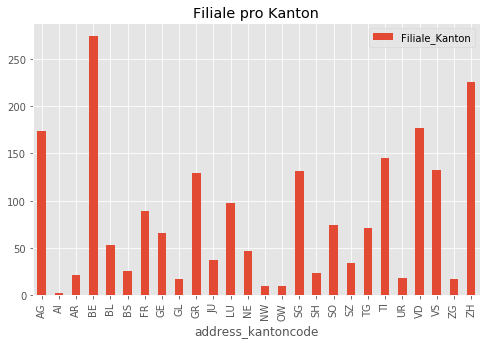

In [44]:
df_Kanton['Filiale_Kanton'].to_frame().plot(kind='bar', figsize=(8, 5))

plt.title('Filiale pro Kanton') 
plt.show()

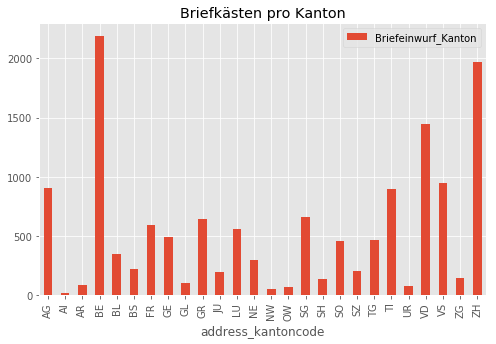

In [45]:
df_Kanton['Briefeinwurf_Kanton'].to_frame().plot(kind='bar', figsize=(8, 5))

plt.title('Briefkästen pro Kanton') 
plt.show()

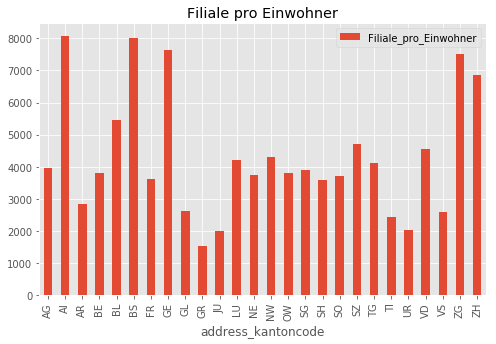

In [46]:
df_Kanton['Filiale_pro_Einwohner'].to_frame().plot(kind='bar', figsize=(8, 5))

plt.title('Filiale pro Einwohner') 
plt.show()

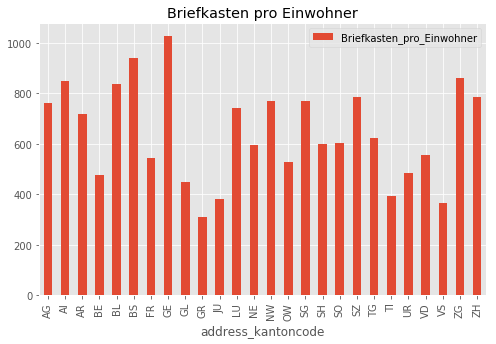

In [47]:
df_Kanton['Briefkasten_pro_Einwohner'].to_frame().plot(kind='bar', figsize=(8, 5))

plt.title('Briefkasten pro Einwohner') 
plt.show()

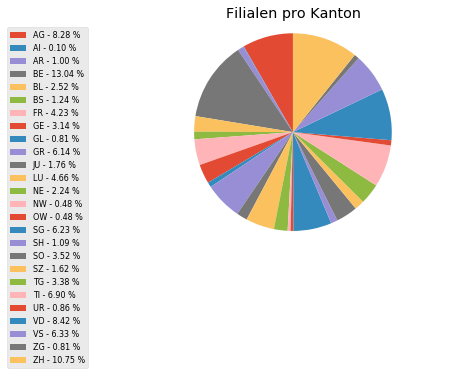

In [48]:
df_temp = df_Kanton['Filiale_Kanton'].to_frame()

y = df_temp['Filiale_Kanton']

patches, texts = plt.pie(y, startangle=90, radius=1.2)

percent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df_temp.index, percent)]

plt.title('Filialen pro Kanton')
plt.axis('equal') 
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()

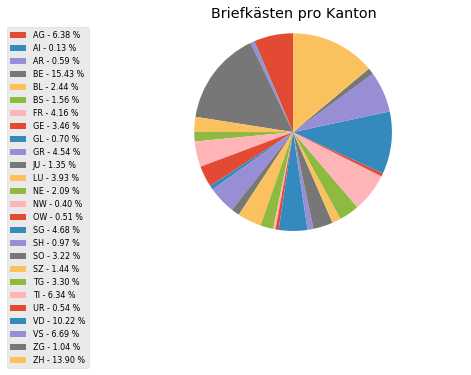

In [49]:
df_temp = df_Kanton['Briefeinwurf_Kanton'].to_frame()

y = df_temp['Briefeinwurf_Kanton']

patches, texts = plt.pie(y, startangle=90, radius=1.2)

percent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df_temp.index, percent)]

plt.title('Briefkästen pro Kanton')
plt.axis('equal') 
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()

In [50]:
# Farbgruppe nach POI-Typ
out_lst_grpType = df_POI_Analyse.poityp_de.unique()
out_df_grpType = pd.DataFrame(out_lst_grpType) 
out_df_grpType = out_df_grpType.rename(columns={0: "poityp_de"})
out_df_grpType['colorGrp'] = out_df_grpType.apply(lambda x : list(np.random.choice(range(256), size=3)), axis=1)

In [51]:
out_df_grpType.sort_values(by='poityp_de').head()

,poityp_de,colorGrp
4,Briefeinwurf,"[104, 79, 91]"
9,Briefzentrum,"[49, 113, 215]"
0,Filiale,"[20, 147, 195]"
1,Hausservice,"[89, 30, 34]"
10,Logistikzentrum Briefe,"[68, 251, 124]"


In [52]:
df_POI_Analyse = pd.merge(df_POI_Analyse, out_df_grpType, on='poityp_de')

In [53]:
df_POI_Analyse.dtypes

address_kantoncode    object
address_gemeindeid     int64
geopoint              object
poityp_de             object
Geopoint_X            object
Geopoint_Y            object
Einwohnerzahl         object
colorGrp              object
dtype: object

In [54]:
#Zeige nur alle Filialen an
df_POI_Analyse = df_POI_Analyse.loc[(df_POI_Analyse['poityp_de'] == 'Filiale')]

In [55]:
df_POI_Analyse.head()
df_POI_Analyse['Geopoint_X'].type()

AttributeError: 'Series' object has no attribute 'type'

In [ ]:
#Geopunkt Zentrum der Schweiz gemäss google maps
latitude = 46.7985124
longitude = 8.2295887

In [ ]:
map_Post_POI = folium.Map(location=[latitude, longitude], zoom_start=8)

for lat, lng, types, colo in zip(df_POI_Analyse['Geopoint_X'], df_POI_Analyse['Geopoint_Y'], df_POI_Analyse['poityp_de'], df_POI_Analyse['colorGrp']):
            label = '{}, {} ; {};'.format(types, lat, lng)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=3,
                popup=label,
                color=f'#{int(colo[0]):02x}{int(colo[1]):02x}{int(colo[2]):02x}',
                fill=True,
                fill_color=f'#{int(colo[0]):02x}{int(colo[1]):02x}{int(colo[2]):02x}',
                fill_opacity=0.7,
                parse_html = False).add_to(map_Post_POI) 
        
map_Post_POI

In [ ]:
#Nun wollen wir anzeigen, wo überall in der Schweiz wir Tickets für Events bei der Post kaufen können.
#Wir verwenden nun den Datensatz "df_basisdaten
df_basisdaten_tickets = df_basisdaten.loc[(df_basisdaten['service_de'] == 'Tickets')]

In [ ]:
# Farbgruppe nach POI-Typ
out_lst_grpType = df_basisdaten_tickets.service_de.unique()
out_df_grpType = pd.DataFrame(out_lst_grpType) 
out_df_grpType = out_df_grpType.rename(columns={0: "service_de"})
out_df_grpType['colorGrp'] = out_df_grpType.apply(lambda x : list(np.random.choice(range(256), size=3)), axis=1)

In [ ]:
out_df_grpType.sort_values(by='service_de').head()

In [ ]:
df_basisdaten_tickets = pd.merge(df_basisdaten_tickets, out_df_grpType, on='service_de')

In [ ]:
df_basisdaten_tickets.head()

In [ ]:
map_buy_tickets = folium.Map(location=[latitude, longitude], zoom_start=8)

for lat, lng, buy_tickets, colo in zip(df_basisdaten_tickets['Geopoint_X'], df_basisdaten_tickets['Geopoint_Y'], df_basisdaten_tickets['service_de'], df_basisdaten_tickets['colorGrp']):
            label = '{}, {} ; {};'.format(buy_tickets, lat, lng)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=3,
                popup=label,
                color=f'#{int(colo[0]):02x}{int(colo[1]):02x}{int(colo[2]):02x}',
                fill=True,
                fill_color=f'#{int(colo[0]):02x}{int(colo[1]):02x}{int(colo[2]):02x}',
                fill_opacity=0.7,
                parse_html = False).add_to(map_buy_tickets) 
        
map_buy_tickets